# Packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit
from math import pi
from matplotlib import cm
from photutils.profiles import RadialProfile
import os

# Importing Data:

In [14]:
file = fits.open('stars.fits')
data = file[0].data

# Creating Stars' List and Corresponding Folders:

In [15]:
stars_list = [
    [538,268],
    [1784,1702],
    [1297,1239],
    [935,401],
    [1782,960],
    [1216,687],
    [1475,680],
    [1633,1086],
    [1603,934],
    [964,1302],
    [1420,1923],
    [1460,2303],
    [670,1655],
    [1904,1796],
    [1306,385],
    [1608,1351],
    [1496,1223],
    [625,1264],
    [1568,2612],
    [435,390]
]

for point in stars_list:
    try:
        os.mkdir('C:/Users/ragna/Desktop/PSF/'+str(point[1])+', '+str(point[0]))
    except:
        print("Folder "+str(point[1])+', '+str(point[0])+' already exists.')

Folder 268, 538 already exists.
Folder 1702, 1784 already exists.
Folder 1239, 1297 already exists.
Folder 401, 935 already exists.
Folder 960, 1782 already exists.
Folder 687, 1216 already exists.
Folder 680, 1475 already exists.
Folder 1086, 1633 already exists.
Folder 934, 1603 already exists.
Folder 1302, 964 already exists.
Folder 1923, 1420 already exists.
Folder 2303, 1460 already exists.
Folder 1655, 670 already exists.
Folder 1796, 1904 already exists.
Folder 385, 1306 already exists.
Folder 1351, 1608 already exists.
Folder 1223, 1496 already exists.
Folder 1264, 625 already exists.
Folder 2612, 1568 already exists.
Folder 390, 435 already exists.


# Defining Cartesian Coordinates:

In [16]:
X, Y = np.mgrid[-15:16:31j, -15:16:31j]

# Functions:

In [19]:
# Cropping star into a 31*31 box:
def box(point):
    star = data[point[0]-15:point[0]+16, point[1]-15:point[1]+16]
    star_normalized = star/star.max()
    return star_normalized

# Plotting star's image and Coordinate-Intensity 3D plot:
def plot(point):
    star = box(point)
    plt.imshow(star, cmap='bone')
    plt.axis('off')
    plt.title('star at ['+str(point[1])+', '+str(point[0])+']')
    plt.savefig(str(point[1])+', '+str(point[0])+'/Picture.png', dpi=120, bbox_inches='tight')
    plt.show()

    ax = plt.figure().add_subplot(projection='3d')
    ax.plot_surface(X, Y, star, cmap='hot')
    plt.savefig(str(point[1])+', '+str(point[0])+'/3D Plot.png', dpi=120, bbox_inches='tight')
    plt.show()

# Creating a radial profile and Fitting a Gaussian Distribution: 
def fitting(point):
    star = box(point)

    rp = RadialProfile(star, [15,15], np.arange(16))
    profile = np.hstack((rp.profile[::-1], rp.profile[1:]))
    r = np.arange(29)

    def fit(x, a, mean, sigma):
        return a*np.exp(-np.power(x-mean,2)/(2*np.power(sigma, 2)))# + shift

    params, covariance = curve_fit(fit, r, profile)
    f_r = fit(r, *params)

    plt.plot(r, profile, label='data')
    plt.plot(r, f_r, label='Radial fit')
    plt.legend()
    plt.title("Gaussian fit to star's Radial profile")
    plt.text(7.5, 0.25, r'$a= $'+str(round(params[0], 2))+r'$, \mu= $'+str(round(params[1], 2))+r'$, \sigma= $'+str(round(abs(params[2]), 2)))
    plt.savefig(str(point[1])+', '+str(point[0])+'/Gaussian fit.png', dpi=120, bbox_inches='tight')
    plt.show()

# Running Code for all selected stars:

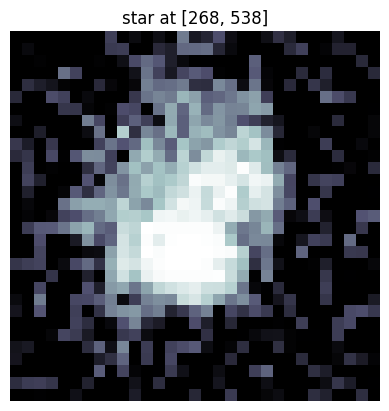

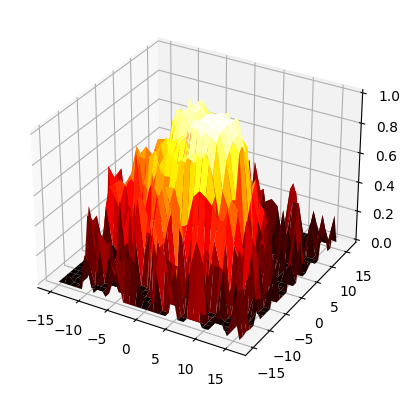

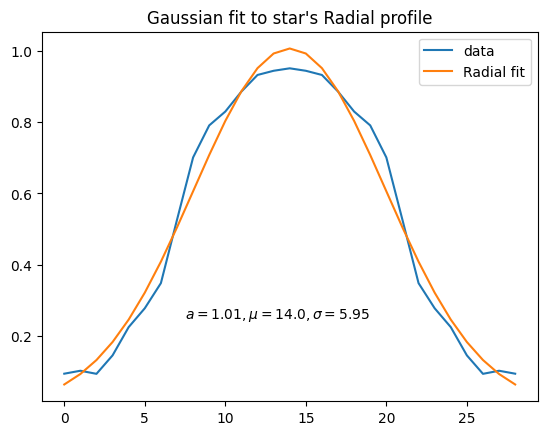

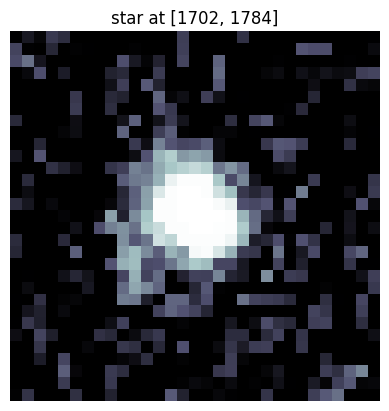

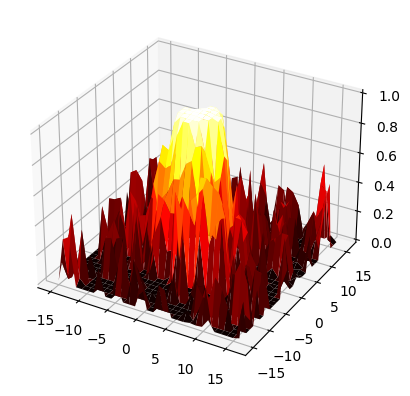

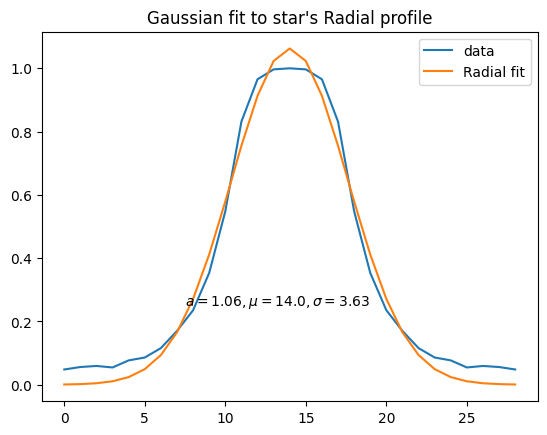

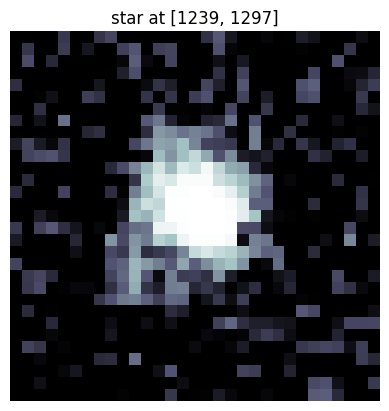

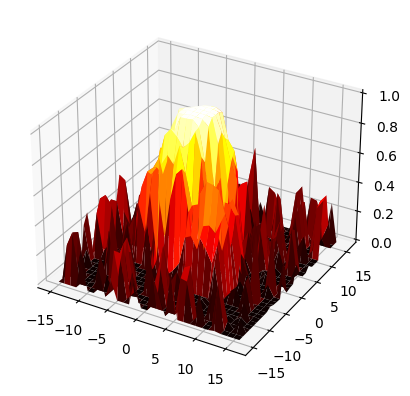

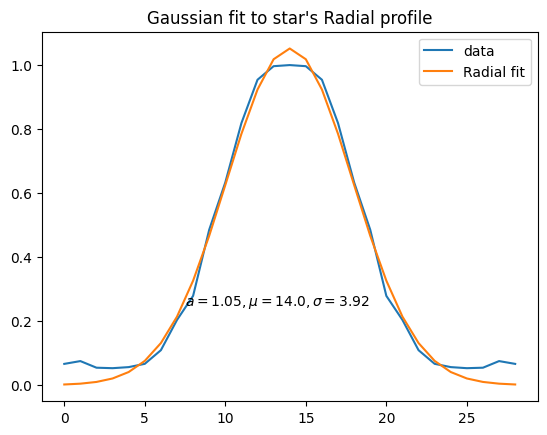

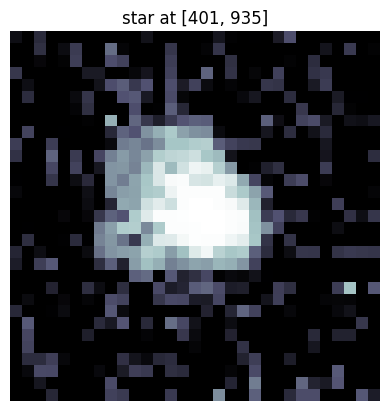

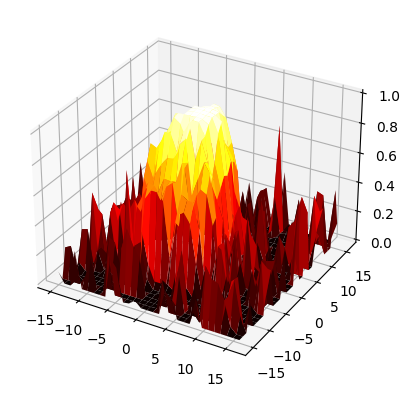

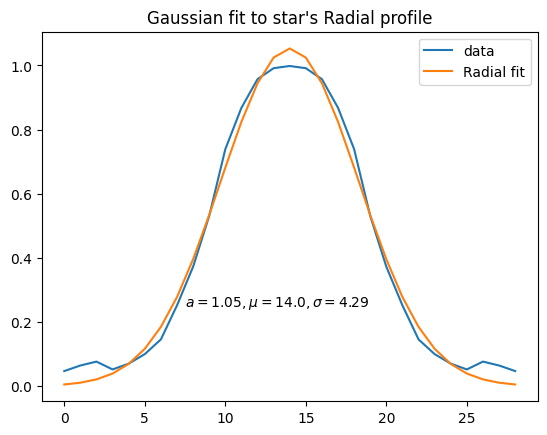

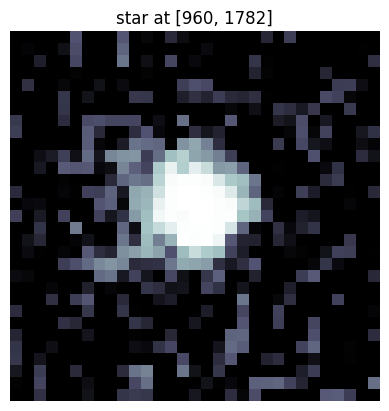

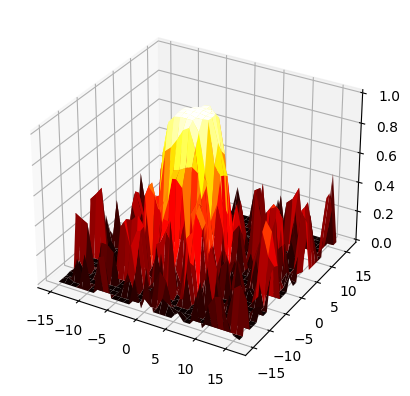

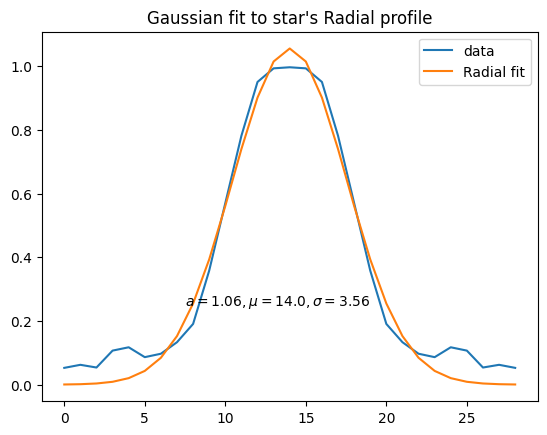

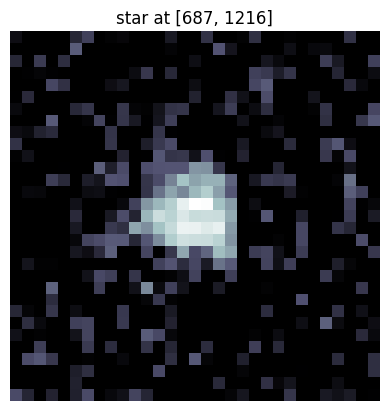

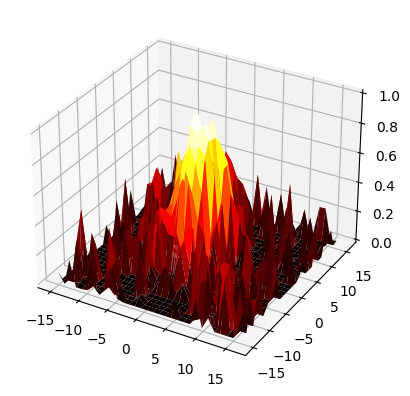

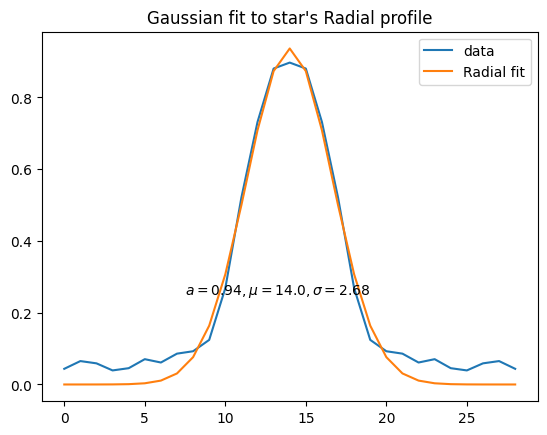

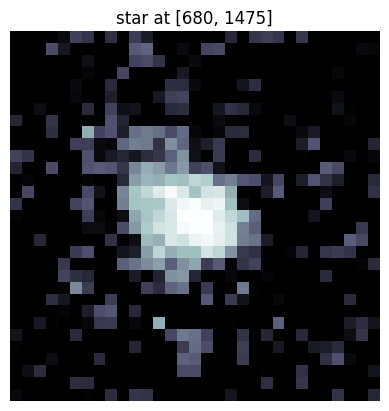

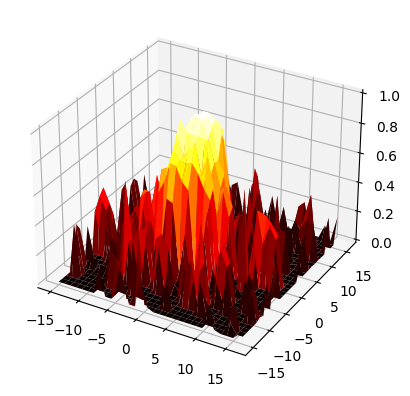

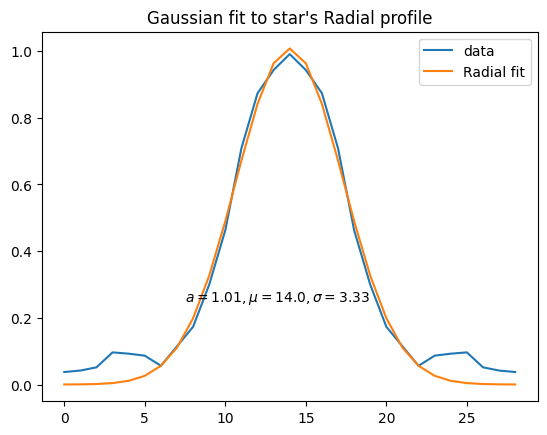

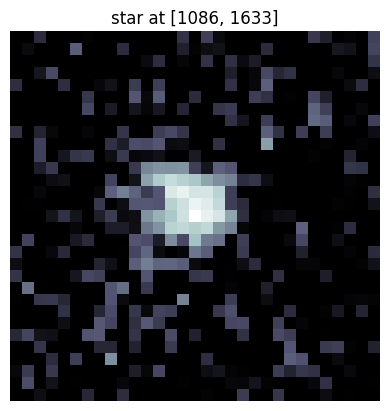

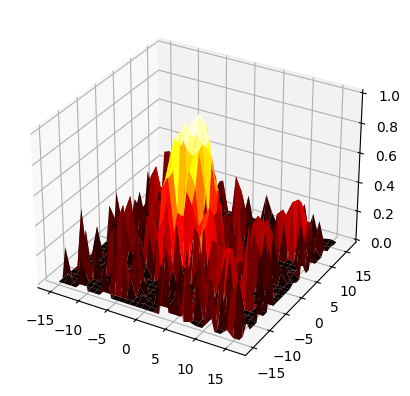

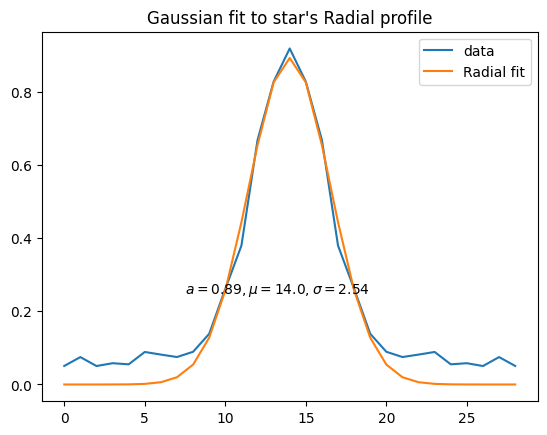

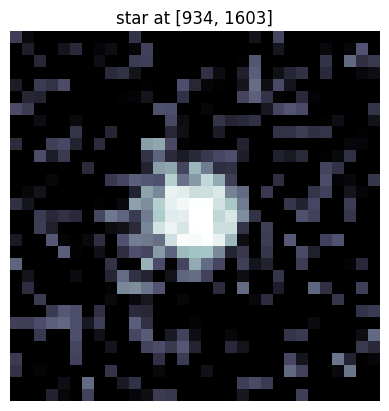

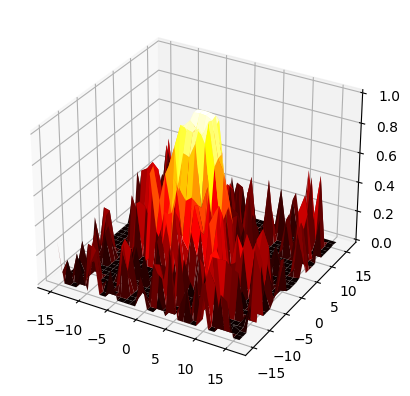

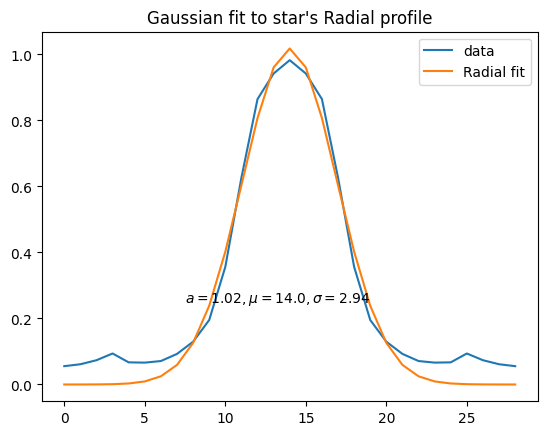

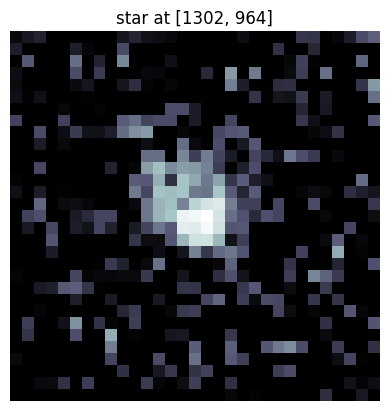

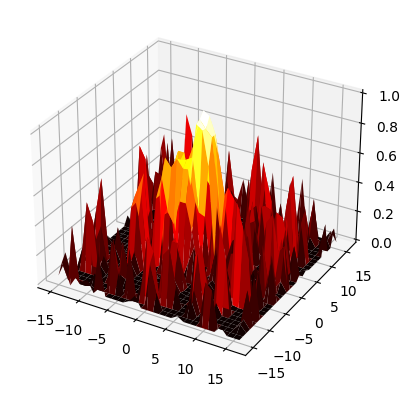

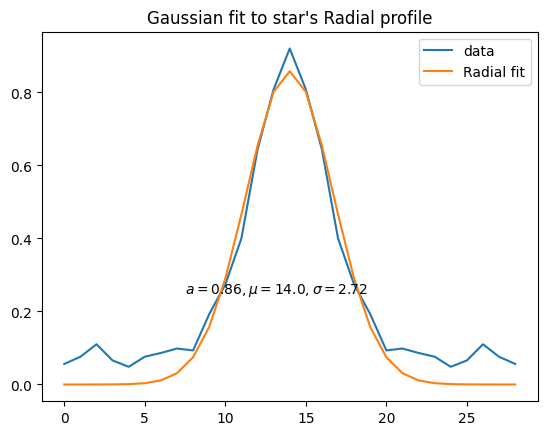

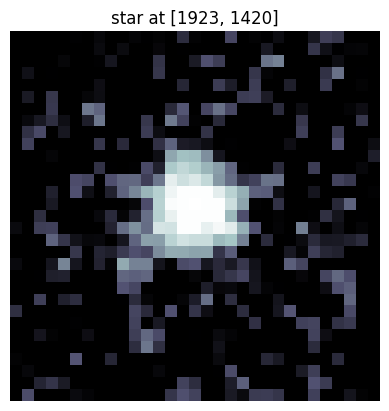

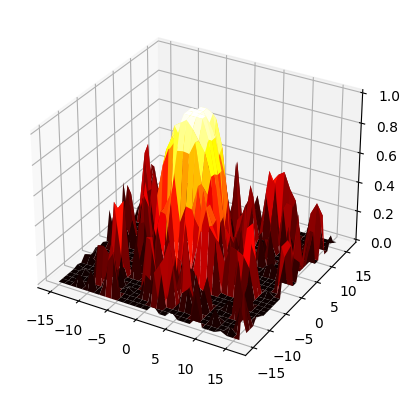

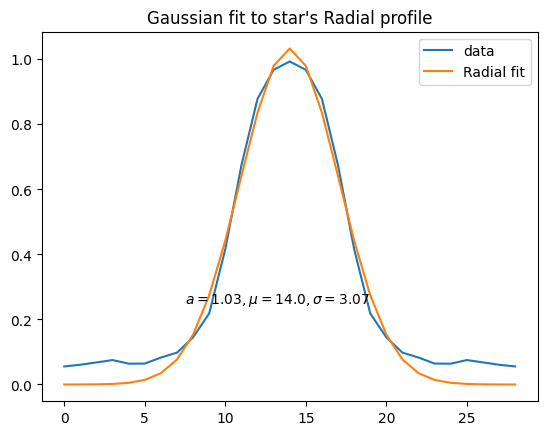

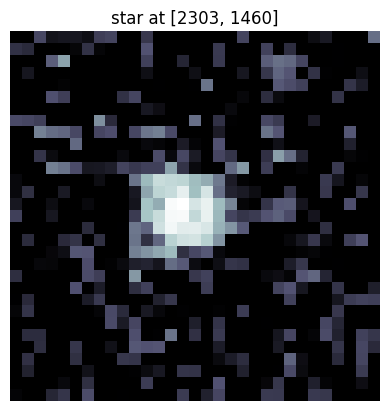

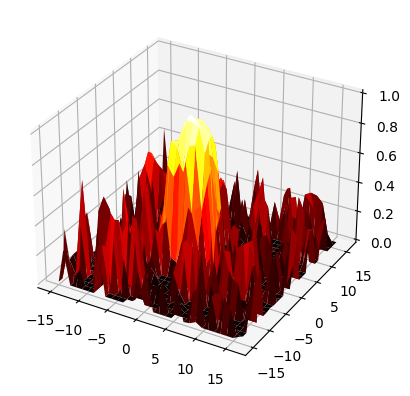

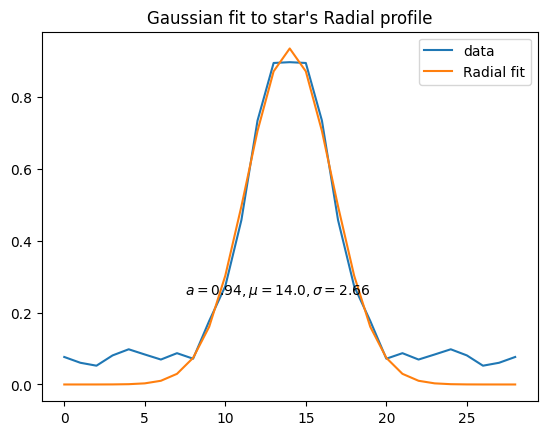

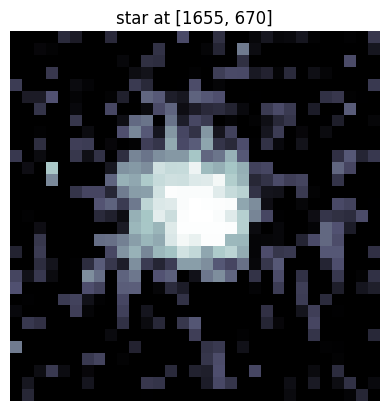

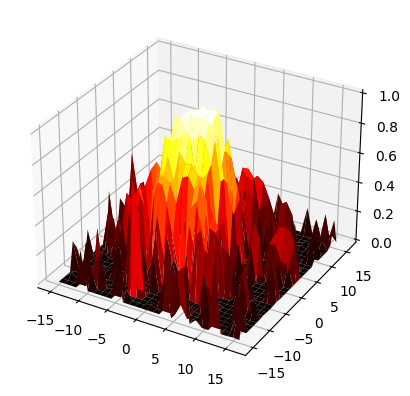

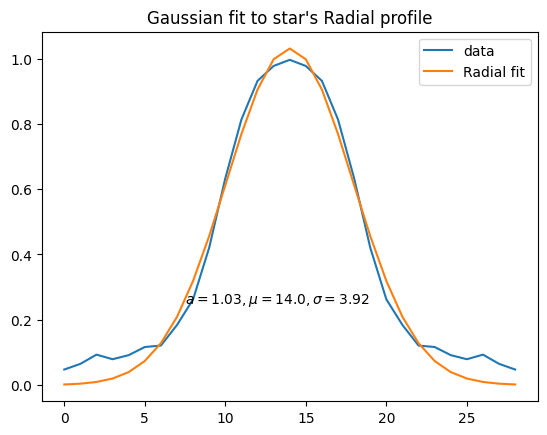

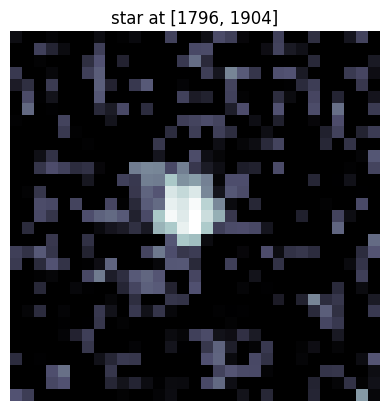

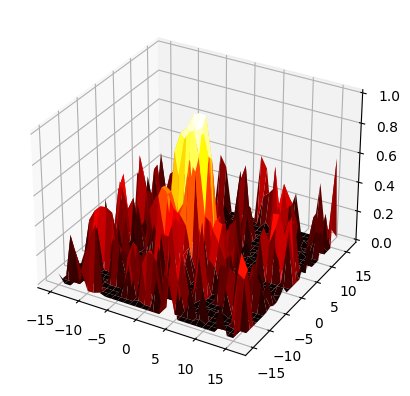

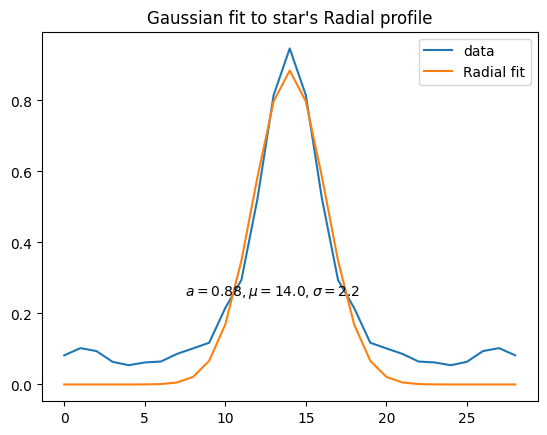

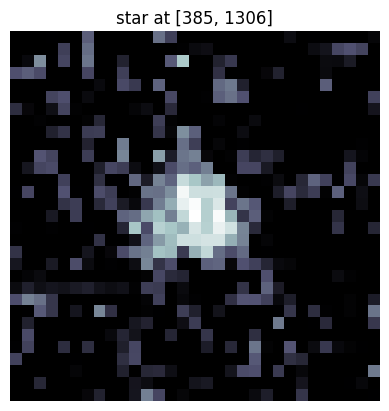

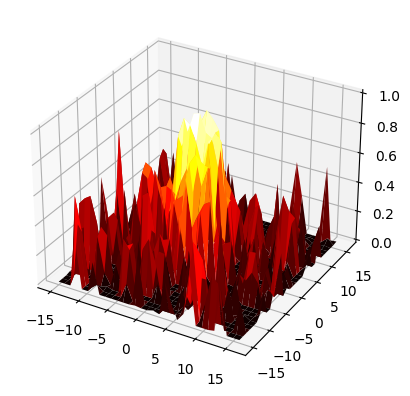

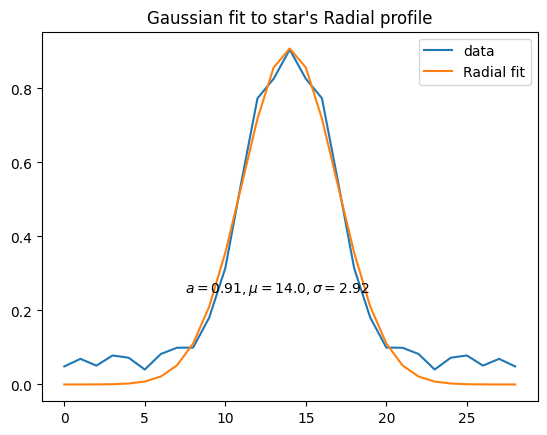

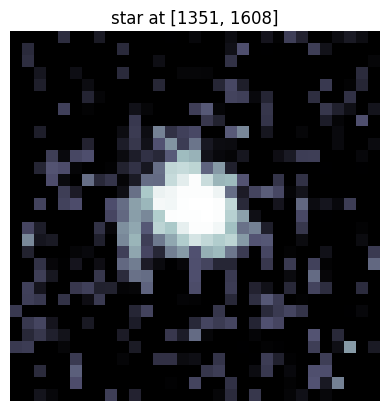

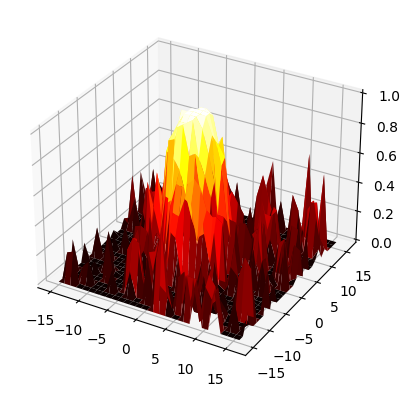

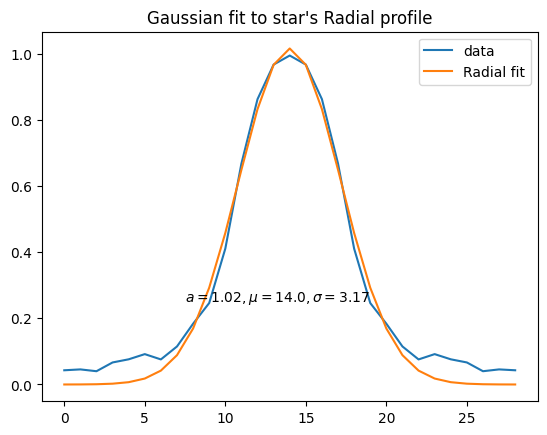

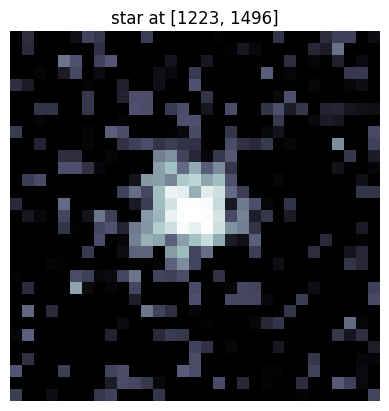

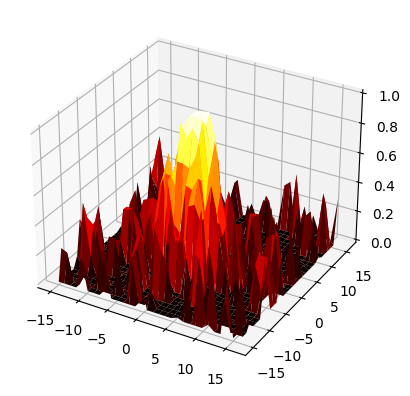

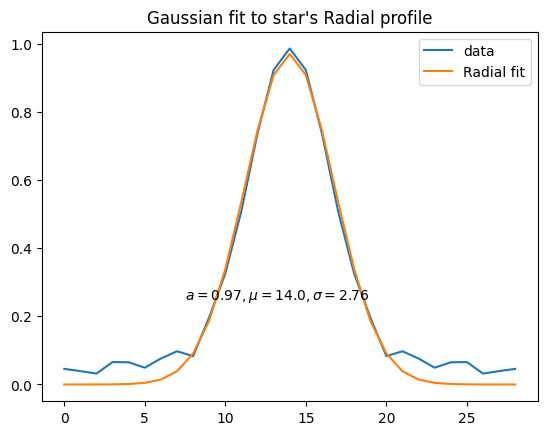

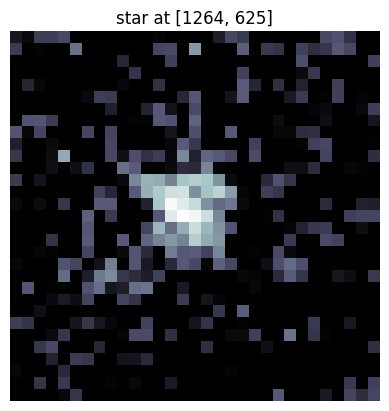

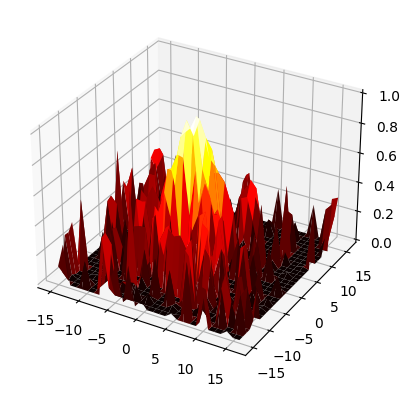

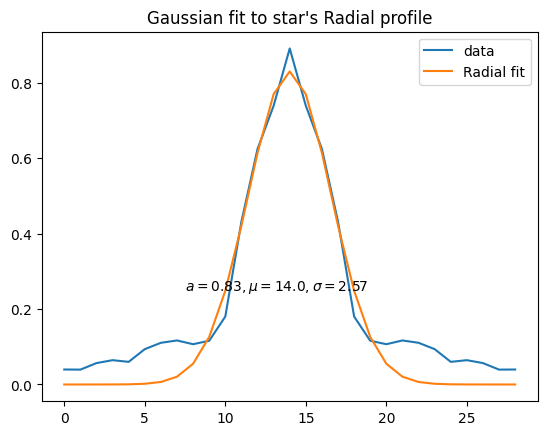

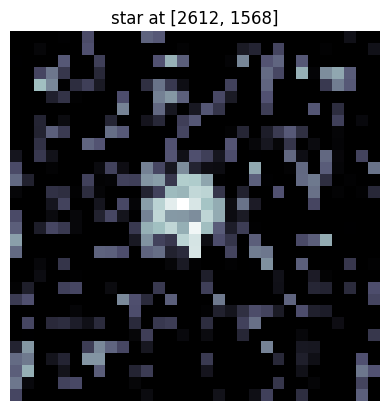

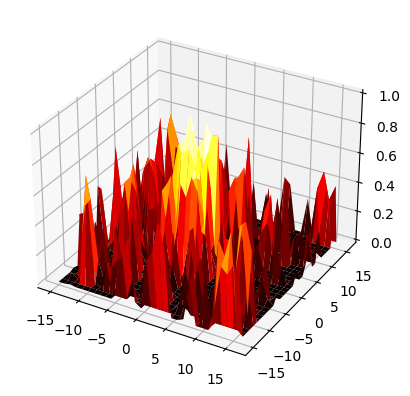

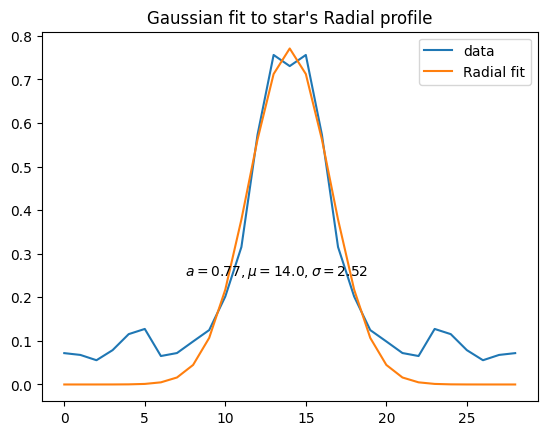

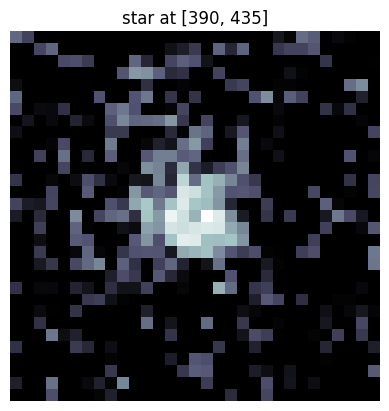

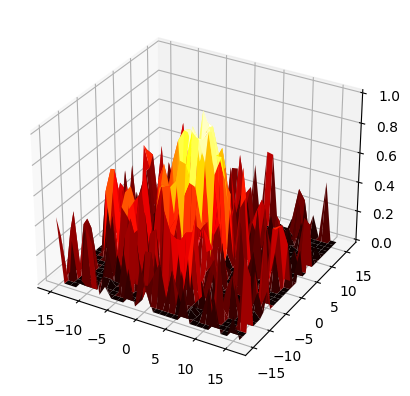

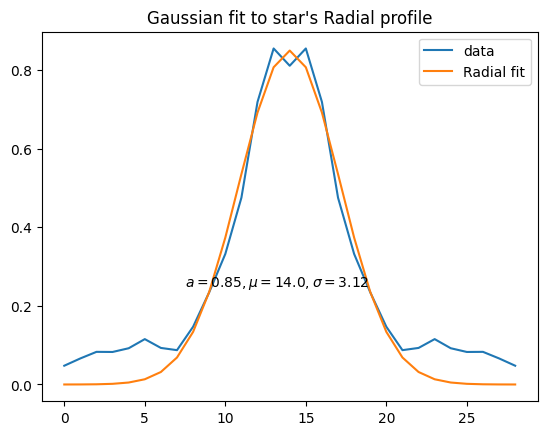

In [18]:
for point in stars_list:
    plot(point)
    fitting(point)